## Exercise 8

Group Name: Broken Toes<br>
Group Members: Emma Bright, Duncan Ferguson, Mike Santoro<br>
Submitted by: Emma Bright<br>
Date: 11/02/2021<br>

***

In [235]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
import math

### Part 1 - Hand Coded K-means

You are to write code implementing the k-means clustering algorithm assuming a 3-dimensional data set and test it.  Make your code work for 3 clusters.  (If you want you can make it work for 2-clusters first then modify for 3-clusters, but the data set I am providing nicely produces three clusters).

In [236]:
def distance(p1,p2):
    '''function takes in two point tuples and returns the distance'''
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    dist = math.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
    return dist

In [237]:
def newCentroid(records):
    x =[]
    y =[]
    z =[]
    for i in records:
        x_temp, y_temp, z_temp = i
        x.append(x_temp)
        y.append(y_temp)
        z.append(z_temp)
    return (mean(x),mean(y),mean(z))

In [238]:
df = pd.read_csv('./exercise8_infile1.csv')
df.head()

,d1,d2,d3
0,18.900508,17.194255,23.165505
1,17.909706,15.273063,22.270691
2,32.304530,30.393287,26.909572
3,12.924216,5.879719,9.355166
4,19.231891,21.771659,21.263804


In [239]:
records = df.to_records(index=False)
records[0]

(18.90050765, 17.19425457, 23.1655046)

In [240]:
len(records)

100

In [241]:
centroids = df.sample(n=3,replace=False).to_records(index=False).tolist()
centroids

[(12.665820150259892, 11.025859640836018, 9.403814329794567),
 (18.717748009504277, 20.243642541982872, 22.25896781582384),
 (12.828965453030133, 7.166709996649914, 11.34702691473969)]

In [242]:
centroidCurrent = df.sample(n=3,replace=False).to_records(index=False).tolist()
centroidNew = [(0,0,0),(0,0,0),(0,0,0)]

centroidCurrent = df.sample(n=3,replace=False).to_records(index=False).tolist()
centroidNew = [(0,0,0),(0,0,0),(0,0,0)]
count =0
while centroidCurrent != centroidNew:
    if count > 0:
            centroidCurrent = centroidNew
    cluster0 = []
    cluster1 = []
    cluster2 = []
    for point in records:
        d_c0 = distance(point, centroidCurrent[0])
        d_c1 = distance(point, centroidCurrent[1])
        d_c2 = distance(point, centroidCurrent[2])
        minDist = min([d_c0,d_c1,d_c2])
        if minDist == d_c0:
            cluster0.append(point)
        elif minDist == d_c1:
            cluster1.append(point)
        elif minDist == d_c2:
            cluster2.append(point)
    centroid0 = newCentroid(cluster0)
    centroid1 = newCentroid(cluster1)
    centroid2 = newCentroid(cluster2)
    centroidNew = [centroid0,centroid1,centroid2]
    count += 1


print(f'Centroid 0: {centroidNew[0]}')
print(f'Number of Points: {len(cluster0)}')
print(f'Cluster 0: {cluster0}')
print()
print(f'Centroid 1: {centroidNew[1]}')
print(f'Number of Points: {len(cluster1)}')
print(f'Cluster 1: {cluster1}')
print()
print(f'Centroid 2: {centroidNew[2]}')
print(f'Number of Points: {len(cluster2)}')
print(f'Cluster 2: {cluster2}')

Centroid 0: (32.12861114123355, 30.29610228820364, 32.366125923385425)
Number of Points: 10
Cluster 0: [(31.41014476, 26.64011609, 33.99995127), (33.95938105, 29.23546907, 31.05064016), (30.56133015, 29.85377459, 32.32067714), (33.47476935, 30.99400602, 32.27383796), (33.25095666, 28.50930775, 30.84907394), (32.21055575, 31.36581132, 34.80658512), (31.98677116, 29.78532685, 34.8849834), (29.8172419, 32.79801997, 32.46692729), (30.92971026, 30.87633269, 32.24465664), (33.68525037, 32.90285852, 28.7639263)]

Centroid 1: (15.836589592958148, 15.650962563664628, 15.907070720018288)
Number of Points: 71
Cluster 1: [(18.90050765, 17.19425457, 23.1655046), (17.90970634, 15.27306279, 22.2706907), (12.92421587, 5.87971858, 9.35516559), (19.23189129, 21.7716588, 21.26380374), (21.45995119, 20.74598758, 21.06762182), (19.8160534, 18.73778334, 18.18531329), (9.14709982, 12.76281461, 10.19674102), (9.26108503, 8.29989525, 11.92164001), (17.92218815, 17.88348688, 21.31256816), (12.31392655, 13.31960

## Part 2 - sklearn K-means

Write code to use the k-means clustering algorithm.   Test your data on the same data set as above.  You should print out the same data as above for the hand coded version.  Also use the predict method to show your model successfully predicting which cluster a new point should be added to.  For example this code does just that for point (8,8,8), (19,19,19), and (31,31,31):

In [243]:
X = pd.read_csv('./exercise8_infile1.csv').to_numpy()

C:\Users\dunca\AppData\Local\Temp/ipykernel_27204/3256023256.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


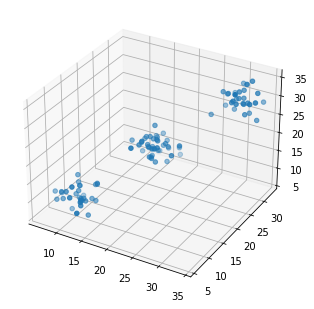

In [244]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,2],  label='True Position')
plt.show()

In [245]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
print(f'The means for the center are:\n {kmeans.cluster_centers_}')

The means for the center are:
 [[10.68939536  9.85623874 10.38261651]
 [19.82566512 20.14187353 20.18852273]
 [30.85866444 29.82747351 30.36625507]]


In [246]:
print(f'Using the clustering model to predict clusters now:\n{kmeans.predict([ [8,8,8], [19,19,19], [31,31,31]])}')

Using the clustering model to predict clusters now:
[0 1 2]


C:\Users\dunca\AppData\Local\Temp/ipykernel_27204/1178695136.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


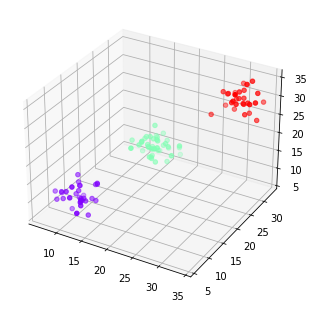

In [247]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,2],  c=kmeans.labels_, cmap='rainbow')
plt.show()